Bottom boundary Layers
--------------------

This notebook compares the effect of the bottom drag flag on Barkley-like canyon runs 13 and 15. The values of bottomDragquadratic are 0.002 and 0.004 respectively.

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

In [4]:
filename1a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename1a)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2a)

#for dimobj in GridOut.variables.values():
#    print dimobj


filename1b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run15/stateGlob.nc'
StateOut = Dataset(filename1b)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run15/gridGlob.nc'
GridOut = Dataset(filename2b)

#for dimobj in GridOut.variables.values():
#    print dimobj




In [21]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
#print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = rout.getField(filename2a, 'XC') # x coords tracer cells

yc = rout.getField(filename2a, 'YC') # y coords tracer cells

bathy = rout.getField(filename2a, 'Depth')

MaskC = rout.getMask(filename2a,'HFacC')

ugrida = rout.getField(filename1a,'U')
vgrida = rout.getField(filename1a,'V')

ugridb = rout.getField(filename1b,'U')
vgridb = rout.getField(filename1b,'V')

ua,va = rout.unstagger(ugrida,vgrida)

ub,vb = rout.unstagger(ugridb,vgridb)




(19, 90, 359, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


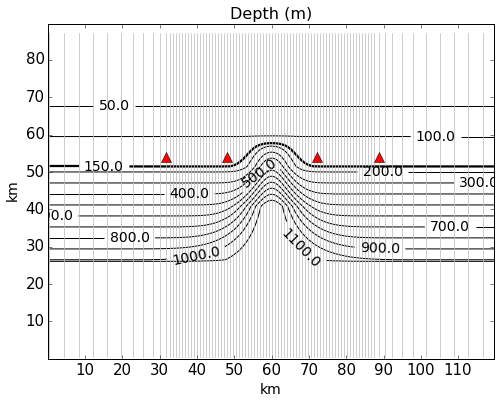

In [9]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

plt.plot(xc[::4,::4],yc[::4,::4],linewidth=0.75, linestyle='-', color='0.75')

plt.plot(xc[210,120],yc[210,120],'r^',markersize=10 )

plt.plot(xc[210,240],yc[210,240],'r^',markersize=10 )

plt.plot(xc[210,40],yc[210,40],'r^',markersize=10 )

plt.plot(xc[210,320],yc[210,320],'r^',markersize=10 )


lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[1,1,2.25,1,1,1,1,1,1,1,1,1,1] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=14)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)


#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')



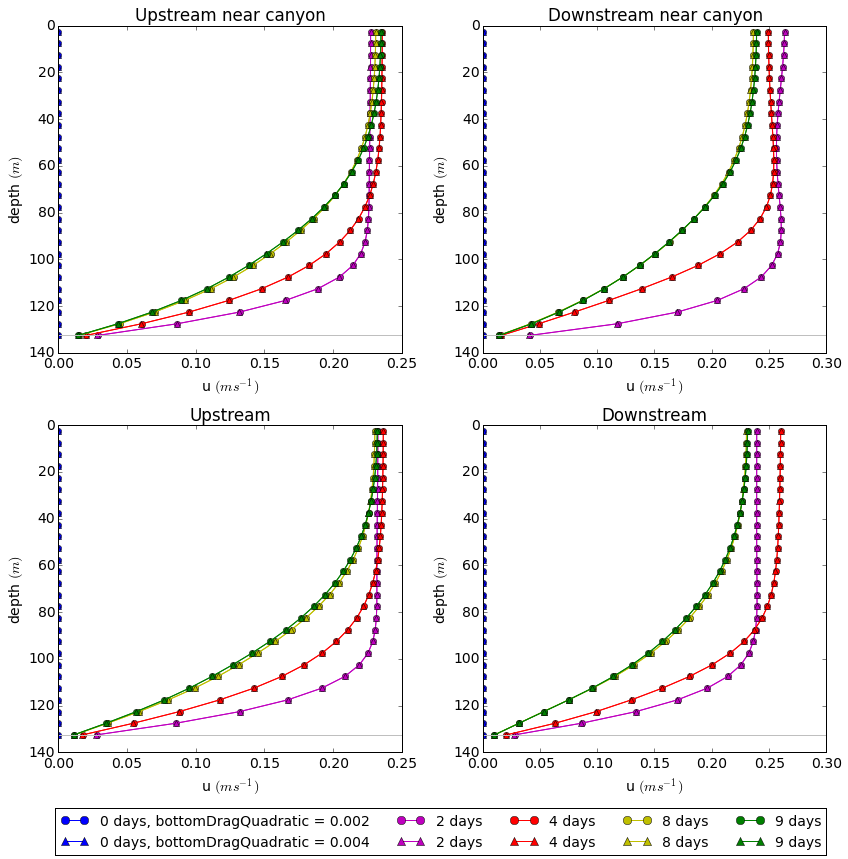

x1 location = 48100.0 m
y location = 54100.0 m
x2 location = 72100.0 m
x3 location = 31761.0 m
x4 location = 88657.0 m


In [117]:
#Profile alongshore velocity (u) from surface to shelf- bottom boundary layer over the shelf

params = {'legend.fontsize': 14}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)

kk=1

fig45=plt.figure(figsize=(12,12))

import itertools
colors = itertools.cycle(['b','b','b','b','m','m','m','m','r','r','r','r','y','y','y','y','g','g','g','g'])


for tt in [0,4,8,16,18] :
        
        kk=1
        plt.subplot(2,2,kk)
        ax = plt.gca()
        
        Trmaska=np.ma.array(ua[tt,:,:,:],mask=MaskC[:,:-1,:-1])
        Trmaskb=np.ma.array(ub[tt,:,:,:],mask=MaskC[:,:-1,:])
        
        color = colors.next()
        line1 = plt.plot(Trmaska[0:28,210,120],-z[0:28],'-o',c=color,label= str(tt/2))
        line2 = plt.plot(Trmaskb[0:28,210,120],-z[0:28],'-^',c=color,label= str(tt/2))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        
        
        plt.subplot(2,2,kk+1)
        ax = plt.gca()
        
        color = colors.next()
        line3 = plt.plot(Trmaska[0:28,210,240],-z[0:28],'-o',c=color,label=str(tt/2))
        line4 = plt.plot(Trmaskb[0:28,210,240],-z[0:28],'-^',c=color,label=str(tt/2))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Downstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
       
        
        plt.subplot(2,2,kk+2)
        ax = plt.gca()
        
        color = colors.next()
        line5 = plt.plot(Trmaska[0:28,210,40],-z[0:28],'-o',c=color,label=str(tt/2))
        line6 = plt.plot(Trmaskb[0:28,210,40],-z[0:28],'-^',c=color,label=str(tt/2))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
       
        
        plt.subplot(2,2,kk+3)
        ax = plt.gca()
        
        color = colors.next()
        line7 = plt.plot(Trmaska[0:28,210,320],-z[0:28],'-o',c=color,label='%i days, BDQ 0.002 ' %(tt/2))
        line8 = plt.plot(Trmaskb[0:28,210,320],-z[0:28],'-^',c=color,label='%i days, BDQ 0.004' %(tt/2))
        plt.axhline(y=-z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Downstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
          
        
plt.tight_layout()

fig45.subplots_adjust(bottom=0.12)

import matplotlib.lines as mlines

blueA = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=8, label='0 days, bottomDragQuadratic = 0.002')
blueB = mlines.Line2D([], [], color='blue', marker='^',
                          markersize=8, label='0 days, bottomDragQuadratic = 0.004')
magA = mlines.Line2D([], [], color='m', marker='o',
                          markersize=8, label='2 days')
magB = mlines.Line2D([], [], color='m', marker='^',
                          markersize=8, label='2 days')
redA = mlines.Line2D([], [], color='r', marker='o',
                          markersize=8, label='4 days')
redB = mlines.Line2D([], [], color='r', marker='^',
                          markersize=8, label='4 days')
yelA = mlines.Line2D([], [], color='y', marker='o',
                          markersize=8, label='8 days')
yelB = mlines.Line2D([], [], color='y', marker='^',
                          markersize=8, label='8 days')
greA = mlines.Line2D([], [], color='g', marker='o',
                          markersize=8, label='9 days')
greB = mlines.Line2D([], [], color='g', marker='^',
                          markersize=8, label='9 days')




plt.figlegend(handles=[blueA,blueB,magA,magB,redA,redB,yelA,yelB,greA,greB],labels=['0 days, bottomDragQuadratic = 0.002',
                                                                                   '0 days, bottomDragQuadratic = 0.004',
                                                                                   '2 days','2 days','4 days','4 days',
                                                                                   '8 days','8 days','9 days','9 days']
              ,ncol=5, bbox_to_anchor=(0.51, 0.005),loc=8, borderaxespad=0.)

plt.show()
print("x1 location = %1.1f m" % xc[210,120])
print("y location = %1.1f m" % yc[210,120])
print("x2 location = %1.1f m" % xc[210,240])
print("x3 location = %1.1f m" % xc[210,40])
print("x4 location = %1.1f m" % xc[210,320])


52100.0


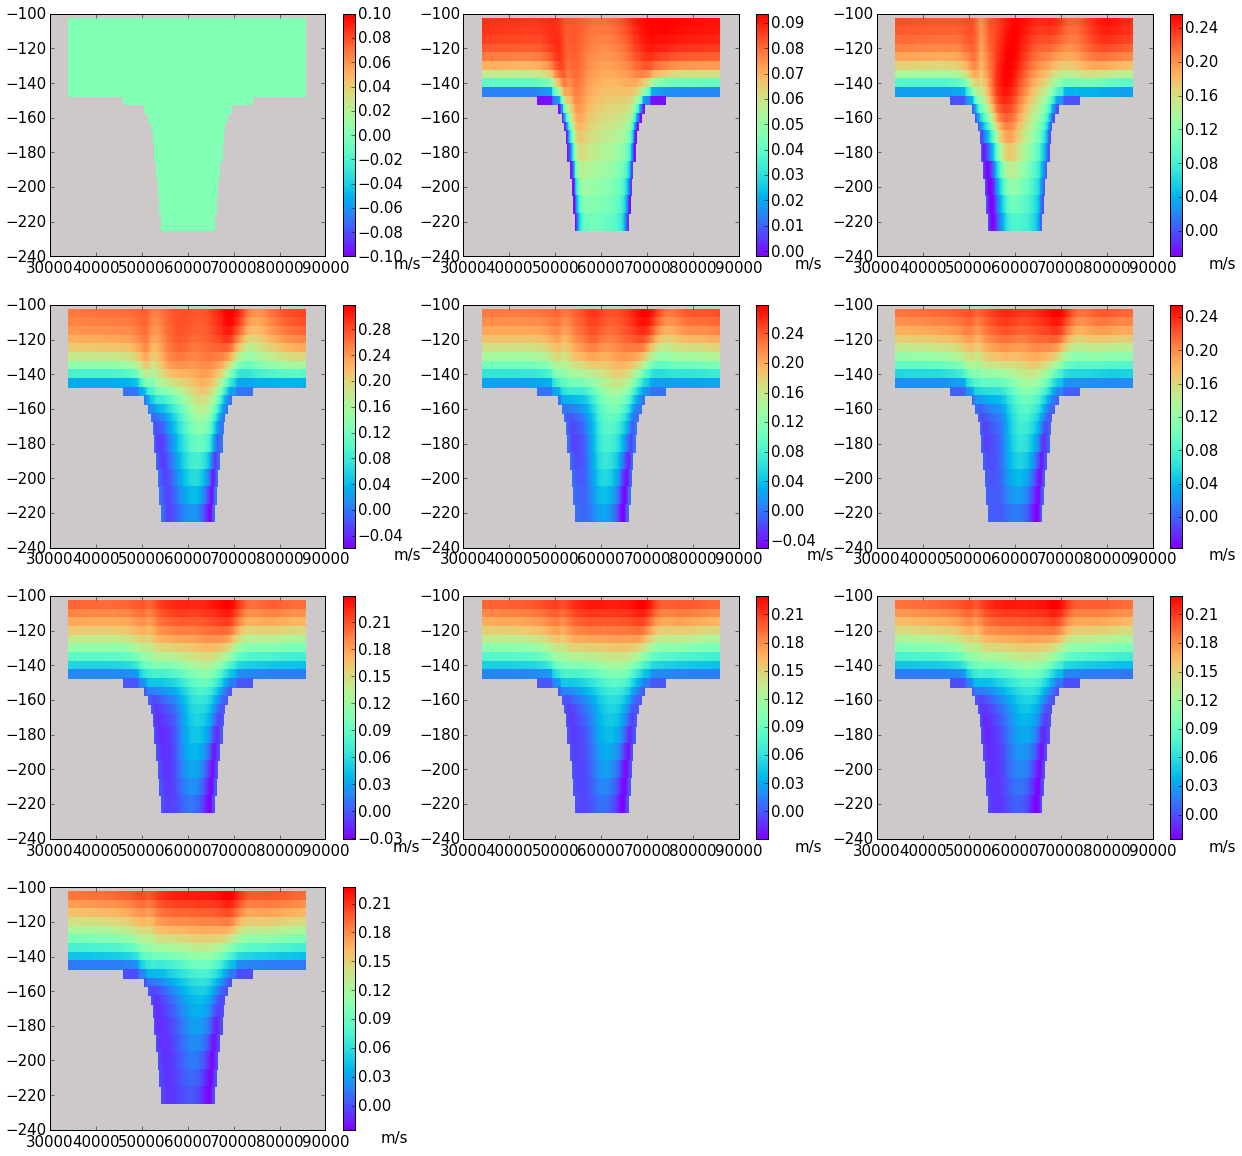

In [12]:
#Zoom into bottom boundary layer over the shelf


plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        Trmask=np.ma.array(ua[tt,:,:,:],mask=MaskC[:,:-1,:-1])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-51],z[20:40],Trmask[20:40,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  